In [2]:
# from google.colab import drive
import pandas as pd

import re 
import nltk 
import string

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
# drive.mount('/content/drive',force_remount=True)
# path1 = "/content/drive" + "/My Drive/" + "AnushaCodes/Paper3/dataset/train.csv"
# path2 = "/content/drive" + "/My Drive/" + "AnushaCodes/Paper3/dataset/test.csv"
path1 = r'./datasets/train.csv'
path2 = r'./datasets/test.csv'

In [4]:
data1 = pd.read_csv(path1)
df1 = pd.DataFrame(data1)
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
df1

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:
data2 = pd.read_csv(path2)
df2 = pd.DataFrame(data2)
df2.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [7]:
pd.set_option("display.max_colwidth", 300)

In [8]:
train=data1
test=data2

In [9]:
train[train['label'] == 1].head(10)
len(train[train['label'] == 1].head(10))

10

In [10]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [11]:
train.shape, test.shape


((31962, 3), (17197, 2))

In [12]:
train["label"].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

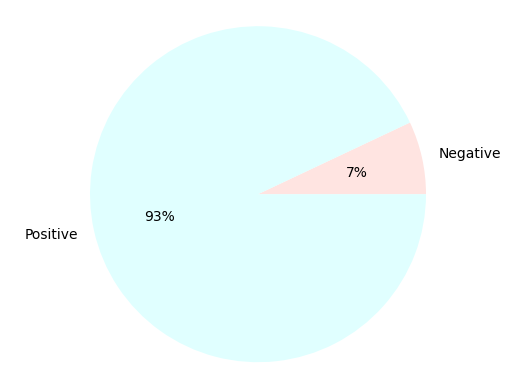

In [13]:
%matplotlib inline

labels=['Negative', 'Positive']
colors = ['mistyrose','lightcyan']
sizes=[train['label'].value_counts()[1],
     train['label'].value_counts()[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors,autopct='%1.0f%%')
ax1.axis('equal')
plt.show()

In [14]:
sizes

[2242, 29720]

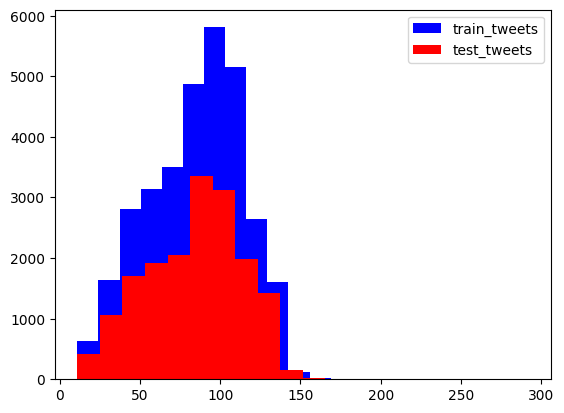

In [15]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets", color='blue')
plt.hist(length_test, bins=20, label="test_tweets", color='red')
plt.legend()
plt.show()

In [16]:
combine = pd.concat([train, test], ignore_index=True, sort=True)

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")
combine['tidy_tweet'] = combine['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
combine['tidy_tweet'] = combine['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
combine


<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\mariy\AppData\Local\Temp\ipykernel_25080\1595256902.py:9: SyntaxWarning: invalid escape sequence '\w'
  combine['tidy_tweet'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned today #ohio used words like assets liability never once #clinton thee word #radicalization
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy work conference right mindset leads culture development organizations #work #mindset


In [17]:
for i in range(1,20):
  print(len(combine['tidy_tweet'][i]))

77
19
26
30
82
22
110
64
12
78
118
28
57
90
44
41
13
47
34


In [18]:
tokenised_tweet= combine['tidy_tweet'].apply(lambda x: x.split())
tokenised_tweet.head()


0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [19]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenised_tweet = tokenised_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

for i in range(len(tokenised_tweet)):
    tokenised_tweet[i] = ' '.join(tokenised_tweet[i])
combine['tidy_tweet']=tokenised_tweet

combine.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [20]:
for i in range(1,20):
  print(len(combine['tidy_tweet'][i]))

70
19
26
24
74
19
106
59
11
73
106
25
55
87
44
30
12
43
28


In [21]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [22]:
HT_non_negative = hashtag_extract(combine['tidy_tweet'][combine['label'] == 0])

#hashtag list for negative tweets
HT_negative = hashtag_extract(combine['tidy_tweet'][combine['label'] == 1])

#unnest list
HT_non_negative = sum(HT_non_negative,[])
HT_negative = sum(HT_negative,[])

In [23]:
HT_non_negative

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [24]:
HT_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

In [25]:
a = nltk.FreqDist(HT_non_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 25) 
d

,Hashtag,Count
32,love,1654
39,posit,917
58,smile,676
157,healthi,573
38,thank,534
176,fun,463
343,life,425
92,affirm,423
286,summer,390
4,model,375


C:\Users\mariy\AppData\Local\Temp\ipykernel_25080\247288902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette="cubehelix")


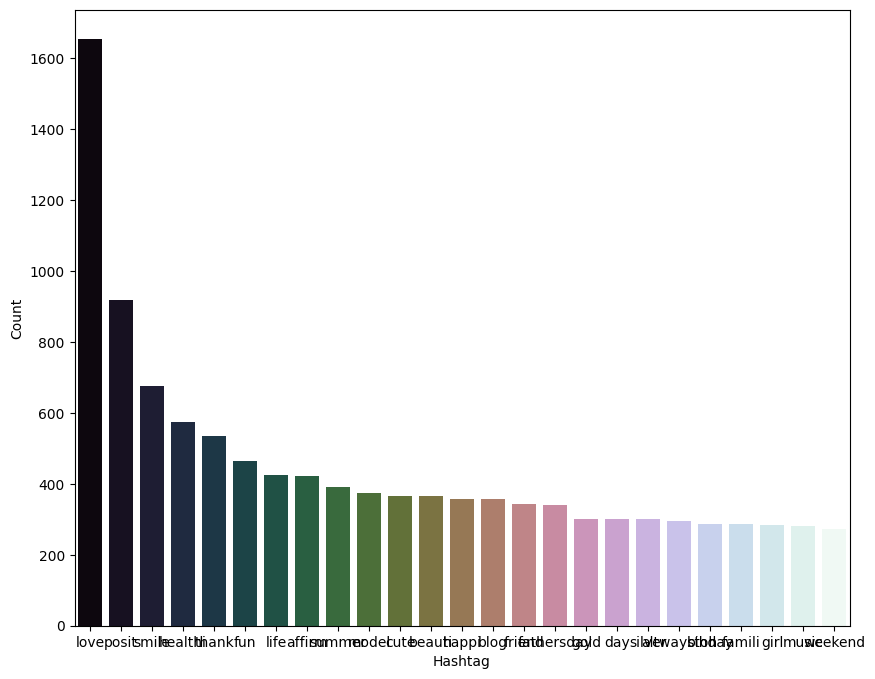

In [26]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette="cubehelix")
ax.set(ylabel = 'Count')
plt.show()

In [27]:
b = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
d

,Hashtag,Count
22,trump,136
31,polit,95
63,allahsoil,92
30,liber,81
28,libtard,77
29,sjw,75
60,retweet,63
59,black,46
62,miami,46
33,hate,37


C:\Users\mariy\AppData\Local\Temp\ipykernel_25080\247288902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette="cubehelix")


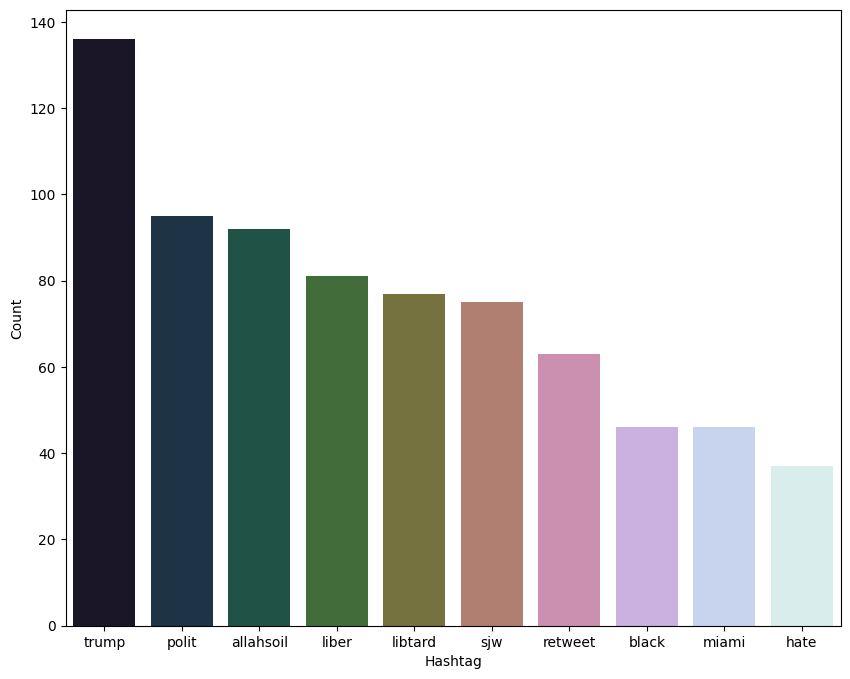

In [28]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count",palette="cubehelix")
ax.set(ylabel = 'Count')
plt.show()

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow=bow_vectorizer.fit_transform(combine['tidy_tweet'])

bow.shape

(49159, 1000)

In [30]:
print(bow)

  (0, 302)	1
  (0, 463)	1
  (0, 738)	1
  (1, 879)	1
  (1, 131)	1
  (1, 600)	1
  (2, 79)	1
  (3, 557)	1
  (3, 518)	1
  (3, 888)	1
  (4, 566)	1
  (5, 423)	1
  (5, 858)	1
  (5, 69)	1
  (5, 485)	1
  (6, 121)	1
  (6, 894)	1
  (7, 749)	2
  (7, 992)	2
  (7, 283)	2
  (7, 883)	1
  (7, 393)	1
  (7, 432)	1
  (7, 353)	1
  (8, 518)	1
  :	:
  (49154, 87)	1
  (49155, 498)	1
  (49155, 307)	1
  (49155, 961)	1
  (49155, 246)	1
  (49156, 891)	1
  (49156, 498)	1
  (49156, 605)	1
  (49156, 980)	2
  (49156, 929)	1
  (49156, 411)	1
  (49156, 122)	1
  (49157, 389)	1
  (49157, 981)	2
  (49157, 175)	1
  (49157, 728)	1
  (49157, 553)	2
  (49157, 480)	1
  (49157, 198)	1
  (49157, 226)	1
  (49157, 612)	1
  (49158, 333)	1
  (49158, 799)	1
  (49158, 243)	1
  (49158, 356)	1


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combine['tidy_tweet'])

tfidf.shape

(49159, 1000)

In [32]:
import gensim
tokenized_tweet = combine['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combine['tidy_tweet']), epochs=20)

(6510028, 7536020)

In [33]:
import numpy as np
import pandas as pd

# Assuming word_vector is a function that returns a numpy array of the specified size
def word_vector(tokens, size):
    vec = np.zeros(size)
    count = 0
    for word in tokens:
        if word in model_w2v.wv:  # Assuming model is your trained Word2Vec model
            vec += model_w2v.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

# Initialize the array to hold the word vectors
wordvec_arrays = np.zeros((len(tokenized_tweet), model_w2v.vector_size))

# Populate the array with word vectors
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], model_w2v.vector_size)

# Convert the array to a DataFrame
wordvec_df = pd.DataFrame(wordvec_arrays)

In [34]:
def word_vector(tokens, size):
    vec = np.zeros(size)
    count = 0.
    for word in tokens:
        if word in model_w2v.wv:
            vec += model_w2v.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

In [35]:
wordvec_arrays = np.zeros((len(tokenized_tweet), model_w2v.vector_size))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], model_w2v.vector_size)

wordvec_df = pd.DataFrame(wordvec_arrays)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [53]:
# #BOW feature model

# train_bow = bow[:31962,:]
# test_bow = bow[31962:,:]

# xtrain_bow, xval_bow,ytrain,yval=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

# lr=LogisticRegression()
# lr.fit(xtrain_bow,ytrain)

# prediction=lr.predict_proba(xval_bow)
# prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(int)

# f1_score(yval,prediction_int)

# print('F1 Score: %.3f' % f1_score(yval,prediction_int))

In [54]:
# score=accuracy_score(yval,prediction_int)*100
# print('Accuracy: %.3f' % score)

In [55]:
# #TF-IDF
# train_tfidf = tfidf[:31962,:]
# test_tfidf = tfidf[31962:,:]

# xtrain_tfidf = train_tfidf[ytrain.index]
# xvalid_tfidf = train_tfidf[yval.index]

# lr.fit(xtrain_tfidf, ytrain)

# prediction = lr.predict_proba(xvalid_tfidf)
# prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(int)

# print('F1 Score: %.3f' % f1_score(yval,prediction_int))

In [56]:
# score=accuracy_score(yval,prediction_int)*100
# print('Accuracy: %.3f' % score)

In [57]:
# #Word2Vec Features
# train_w2v = wordvec_df.iloc[:31962,:]
# test_w2v = wordvec_df.iloc[31962:,:]

# xtrain_w2v = train_w2v.iloc[ytrain.index,:]
# xvalid_w2v = train_w2v.iloc[yval.index,:]

# lr.fit(xtrain_w2v, ytrain)

# prediction = lr.predict_proba(xvalid_w2v)
# prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(int)
# f1_score(yval, prediction_int)
# print('F1 Score: %.3f' % f1_score(yval,prediction_int))

In [58]:
# score=accuracy_score(yval,prediction_int)*100
# print('Accuracy: %.3f' % score)

In [59]:
# BOW feature model
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

xtrain_bow, xval_bow, ytrain, yval = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lr_bow = LogisticRegression()
lr_bow.fit(xtrain_bow, ytrain)

prediction_bow = lr_bow.predict_proba(xval_bow)[:, 1]

# TF-IDF feature model
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yval.index]

lr_tfidf = LogisticRegression()
lr_tfidf.fit(xtrain_tfidf, ytrain)

prediction_tfidf = lr_tfidf.predict_proba(xvalid_tfidf)[:, 1]

# Word2Vec feature model
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yval.index,:]

lr_w2v = LogisticRegression()
lr_w2v.fit(xtrain_w2v, ytrain)

prediction_w2v = lr_w2v.predict_proba(xvalid_w2v)[:, 1]

# Combine predictions
average_prediction = (prediction_bow + prediction_tfidf + prediction_w2v) / 3
prediction_int = average_prediction >= 0.3
prediction_int = prediction_int.astype(int)

# Calculate F1 score
f1 = f1_score(yval, prediction_int)
print('Combined F1 Score: %.3f' % f1)

accuracy = accuracy_score(yval, prediction_int) * 100
print('Combined Accuracy: %.3f' % accuracy)

Combined F1 Score: 0.607
Combined Accuracy: 94.953
